Path length: 11


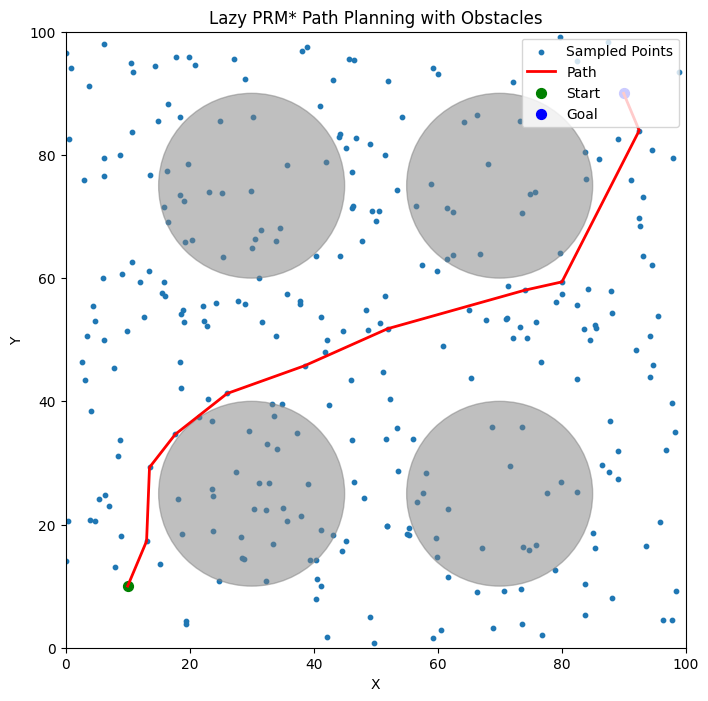

In [29]:
from lazy_utils import LazyPRMStar
from utils import sampler, collision_checker, line_intersects_circle, edge_collision_checker, euclidean_distance, plot
from environment import DEFAULT_START_ST, SIMPLE_CONFIG, DEFAULT_GOAL_ST, State, Environment

env = Environment.from_config(State(*DEFAULT_START_ST), SIMPLE_CONFIG)
start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)

num_samples = 300
k = 15
(start1, start2) = start_state._center_coors
(goal1, goal2) = goal_state._center_coors
obstacles = [{'center': center, 'radius': radius} for center, radius in zip(env._obstacles, env._radiuses)]

lazy_prm_star = LazyPRMStar(sampler, collision_checker, euclidean_distance, (0, env._env_size[0]), (0, env._env_size[1]), num_samples, k, obstacles)
path = lazy_prm_star.query((start1, start2), (goal1, goal2))

print(f"Path length: {len(path)}")
plot(lazy_prm_star, path, (start1, start2), (goal1, goal2), obstacles, (0, env._env_size[0]), (0, env._env_size[1]))